In [1]:
#imports all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:

customer_df = pd.read_csv('customers.csv')
customer_df.drop(['CustomerID'], axis=1, inplace=True)
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


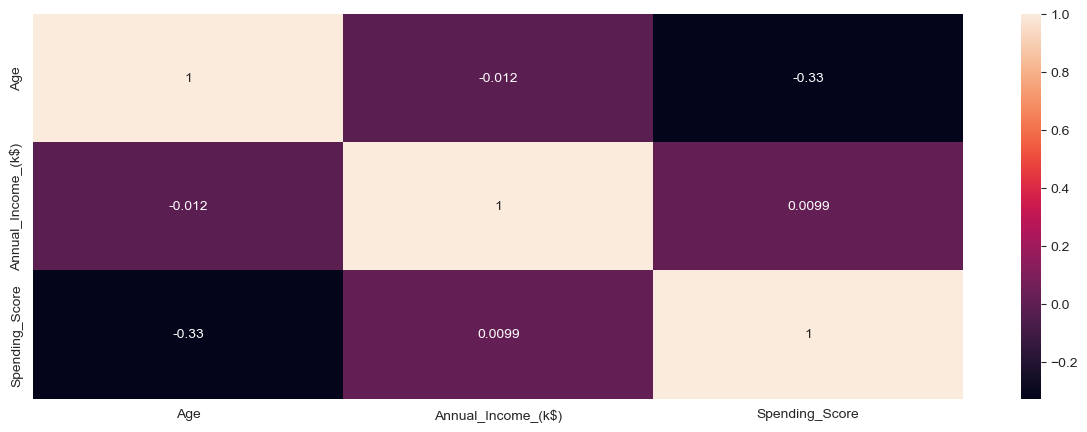

In [5]:
sns.heatmap(customer_df.corr(), annot=True)
plt.show()

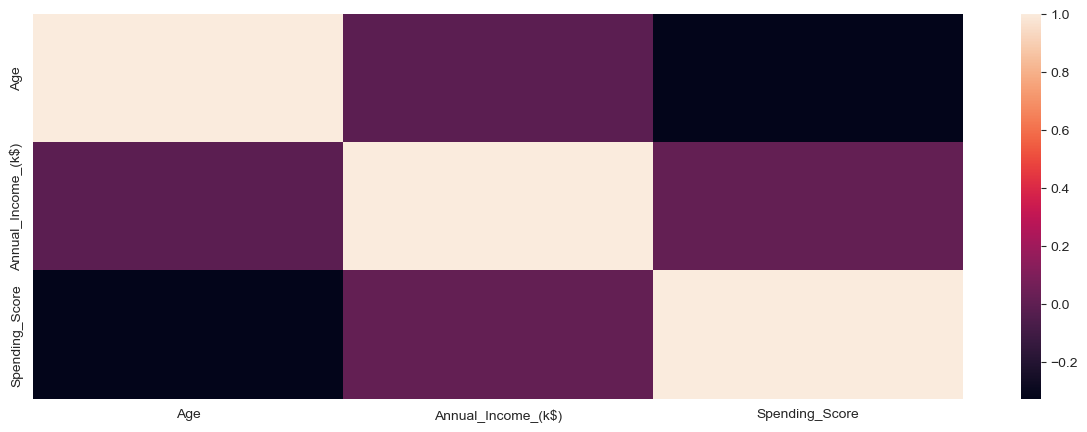

In [6]:
sns.heatmap(customer_df.corr(), annot=False)
plt.show()

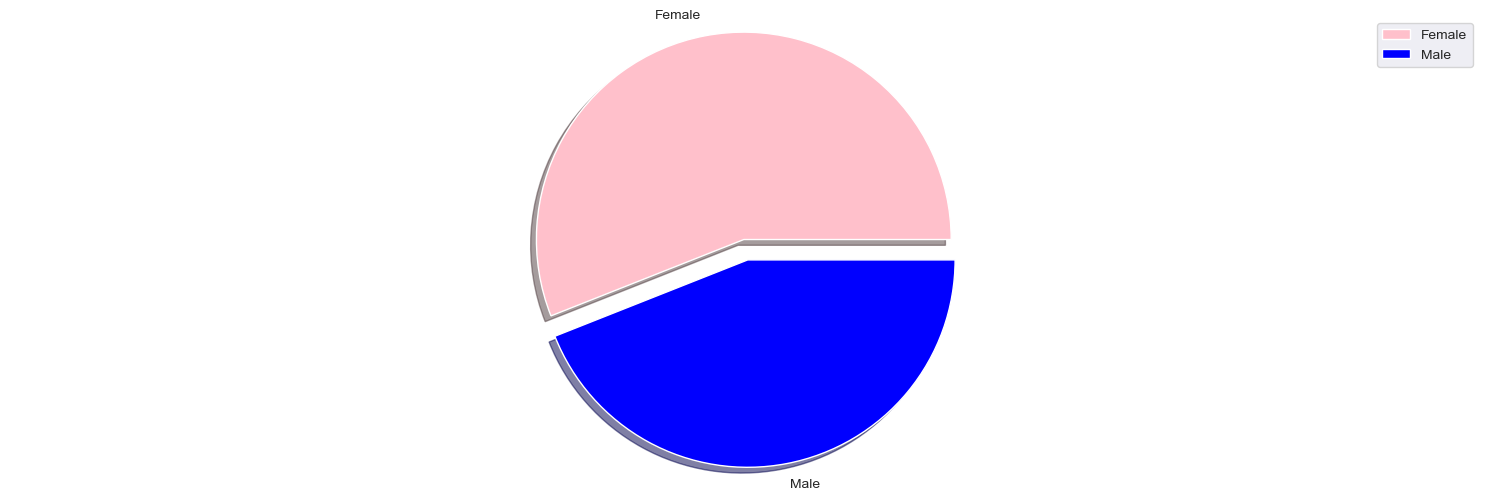

In [8]:
plt.pie(customer_df['Genre'].value_counts(), labels=['Female','Male'], colors=['Pink','Blue'], shadow=True,
        explode=[0,0.1])
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [9]:
# Saving only Spending_Score and income values into X.
X = customer_df.iloc[:, [2, 3]].values

In [10]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=4, metric='euclidean')
db.fit(X)

DBSCAN(eps=3, min_samples=4)

In [11]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

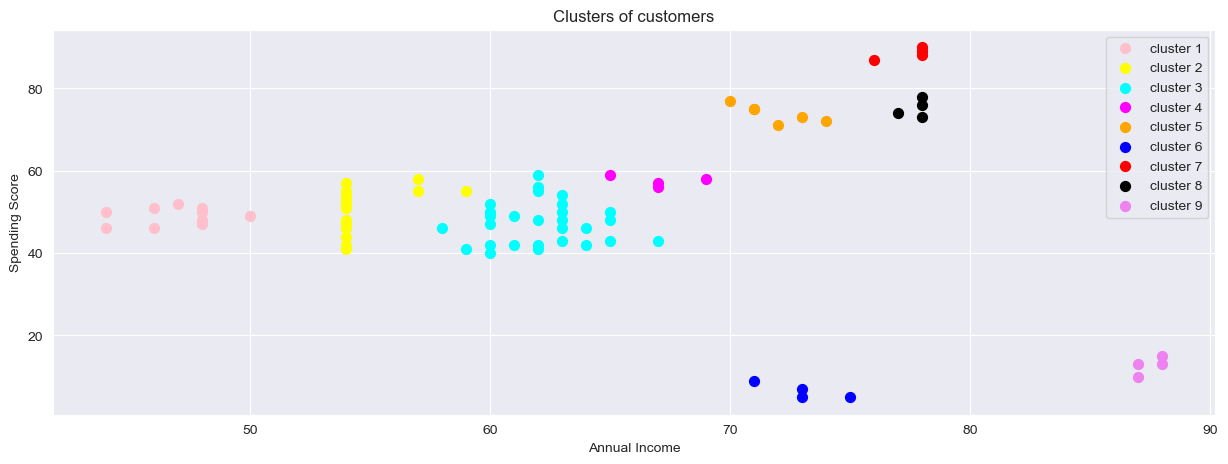

In [12]:
y_preds = db.fit_predict(X)

plt.scatter(X[y_preds == 0, 0], X[y_preds == 0, 1], s = 50, c = 'pink', label='cluster 1')
plt.scatter(X[y_preds == 1, 0], X[y_preds == 1, 1], s = 50, c = 'yellow', label='cluster 2')
plt.scatter(X[y_preds == 2, 0], X[y_preds == 2, 1], s = 50, c = 'cyan', label='cluster 3')
plt.scatter(X[y_preds == 3, 0], X[y_preds == 3, 1], s = 50, c = 'magenta', label='cluster 4')
plt.scatter(X[y_preds == 4, 0], X[y_preds == 4, 1], s = 50, c = 'orange', label='cluster 5')
plt.scatter(X[y_preds == 5, 0], X[y_preds == 5, 1], s = 50, c = 'blue', label='cluster 6')
plt.scatter(X[y_preds == 6, 0], X[y_preds == 6, 1], s = 50, c = 'red', label='cluster 7')
plt.scatter(X[y_preds == 7, 0], X[y_preds == 7, 1], s = 50, c = 'black', label='cluster 8')
plt.scatter(X[y_preds == 8, 0], X[y_preds == 8, 1], s = 50, c = 'violet', label='cluster 9')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [13]:
#we will now try repeating the same steps with our own dataset
cc_df = pd.read_csv('cc.csv')

customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

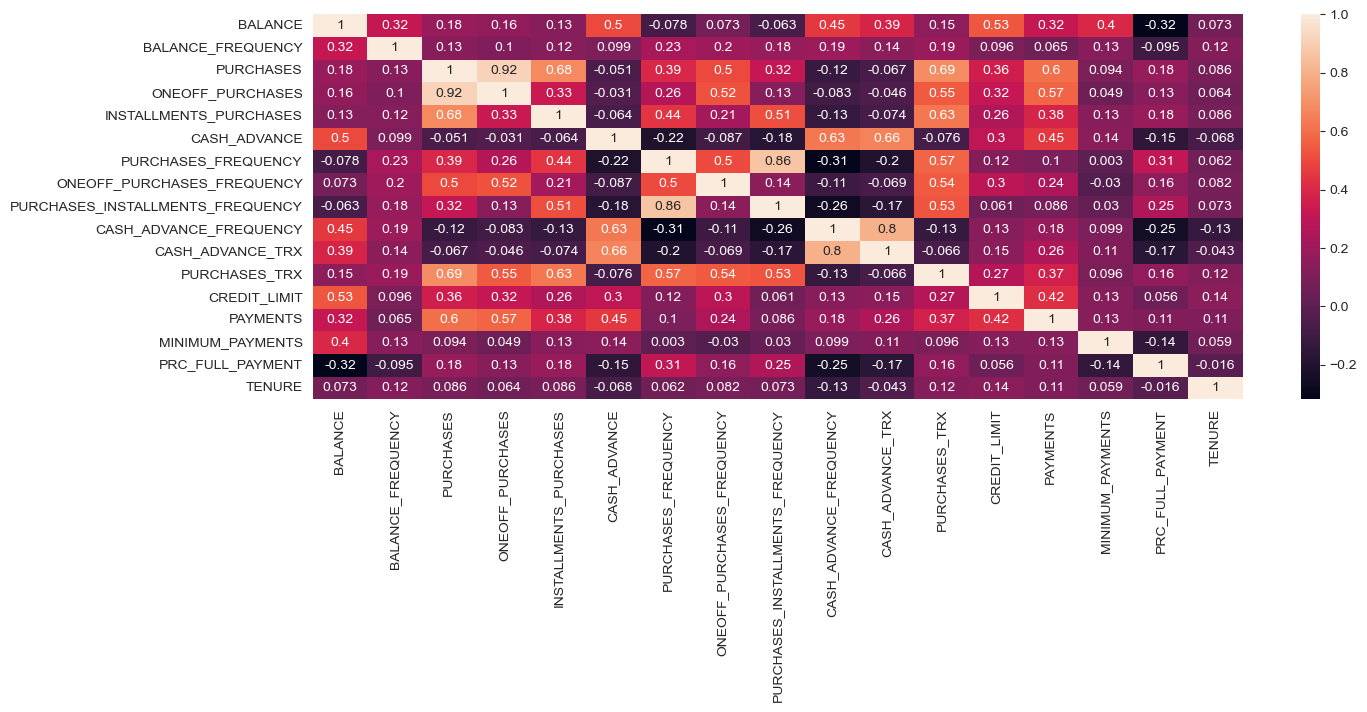

In [17]:
sns.heatmap(cc_df.corr(), annot=True)
plt.show()